# Introduction à Pandas

Lino Galiana  
2026-01-11

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/02_pandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«02_pandas_intro»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«manipulation%2002_pandas_intro»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«02_pandas_intro»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«manipulation%2002_pandas_intro»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//blob/main//notebooks/manipulation/02_pandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **English 🇬🇧 🇺🇸 version**
>
> Ceci est la version française 🇫🇷 de ce chapitre, pour voir la version anglaise rendez-vous sur \<a href="https://pythonds.linogaliana.fr//home/runner/work/python-datascientist/python-datascientist/en/content/manipulation/02_pandas_intro.qmd"\>le site du cours\</a\>.


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Compétences à l’issue de ce chapitre
</div>
</div>
<div class="callout-body-container callout-body">

-   Importer un jeu de données sous forme de *dataframe* `Pandas` et explorer sa structure ;
-   Effectuer des manipulations sur les colonnes et les lignes ;
-   Construire des statistiques agrégées et chaîner les opérations ;
-   Utiliser les méthodes graphiques de `Pandas` pour se représenter rapidement la distribution des données.

</div>
</div>

# 1. Introduction

Le *package* `Pandas` est l’une des briques centrales de l’écosystème de
la *data science* depuis une dizaine d’années. Le *DataFrame*,
objet central dans des langages comme `R`
ou `Stata`, a longtemps été un grand absent dans l’écosystème `Python`.
Pourtant, grâce à `Numpy`, toutes les briques de base étaient présentes
mais méritaient d’être réagencées pour convenir aux besoins
des *data scientists*.

Wes McKinney, lorsqu’il a construit `Pandas`
pour proposer un *dataframe* s’appuyant, en arrière-plan, sur la librairie
de calcul numérique `Numpy`, a permis un grand bond en avant pour `Python`
dans l’analyse de données qui explique sa popularité dans l’écosystème
de la *data science*. `Pandas` n’est pas sans limite[1], nous aurons l’occasion
d’en évoquer quelques unes, mais la grande richesse des méthodes d’analyses
proposées simplifie énormément le travail d’analyse de données.
Pour en savoir plus sur ce *package*, l’ouvrage
de référence de McKinney (2012) présente de nombreuses fonctionnalités du *package*.

Nous nous concentrerons dans ce chapitre sur les éléments les plus pertinents
dans le cadre d’une introduction à la *data science* et laisserons
les utilisateurs intéressés approfondir leurs connaissances
dans les ressources foisonnantes qu’il existe sur le sujet.

Comme les jeux de données prennent généralement de la valeur
en associant plusieurs sources, par exemple pour mettre en relation
un enregistrement avec une donnée contextuelle ou pour lier deux bases
clients afin d’avoir une donnée faisant sens, le chapitre suivant présentera
la manière d’associer des jeux de données
différents avec `Pandas`.
A l’issue du chapitre suivant, grâce à des croisements
de données, nous diposerons d’une base fine sur les empreintes
carbone des Français[2].

## 1.1 Données

Dans ce tutoriel `Pandas`, nous allons utiliser :

-   Les émissions de gaz à effet de serre estimées au niveau communal par l’ADEME. Le jeu de données est
    disponible sur [data.gouv](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_)
    et requêtable directement dans `Python` avec
    [cet url](https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert) ;

Le [chapitre suivant](../../content/manipulation/02_pandas_suite.qmd) permettra de mettre en application des éléments présents dans ce chapitre avec
les données ci-dessus associées à des données de contexte au niveau communal.

## 1.2 Environnement

Nous suivrons les conventions habituelles dans l’import des packages :

[1] L’écosystème équivalent en `R`, le [`tidyverse`](https://www.tidyverse.org/), développé
par *Posit*, est de conception plus récente que `Pandas`. Sa philosophie
a ainsi pu s’inspirer de celle de `Pandas` tout en pouvant remédier à quelques limites
de la syntaxe `Pandas`. Les deux syntaxes étant une mise en oeuvre en `Python` ou `R`
de la philosophie `SQL`, il est naturel qu’elles se ressemblent beaucoup et
qu’il soit pertinent pour les *data scientists* de connaître les deux langages.

[2] A vrai dire, ce n’est pas l’empreinte carbone
mais l’**inventaire national**
puisque la base de données correspond à une vision production,
pas consommation. Les émissions faites dans une commune pour satisfaire
la consommation d’une autre seront imputées à la première là
où le concept d’empreinte carbone voudrait qu’on l’impute
aux secondes. De plus, les émissions présentées ici ne comportent pas
les émissions produites par des biais produits à l’étranger. Il ne s’agit pas, avec cet exercice, de construire une
statistique fiable mais plutôt de comprendre la logique de
l’association de données pour construire des statistiques descriptives.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pour obtenir des résultats reproductibles, on peut fixer la racine du générateur
pseudo-aléatoire.


In [2]:
np.random.seed(123)

Au cours de cette démonstration des principales fonctionalités de `Pandas`, et
lors du chapitre suivant,
je recommande de se référer régulièrement aux ressources suivantes :

-   L’[aide officielle de `Pandas`](https://pandas.pydata.org/docs/user_guide/index.html).
    Notamment, la
    [page de comparaison des langages](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/index.html)
    qui est très utile ;
-   [Ce tutoriel](https://observablehq.com/@observablehq/data-wrangling-translations),
    pensé certes pour les utilisateurs d’[`Observable Javascript`](https://observablehq.com),
    mais qui offre de nombreux exemples intéressants pour les afficionados de `Pandas` ;
-   La *cheatsheet suivante*, [issue de ce post](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

Pour rappel, afin d’exécuter les exemples de code dans un *notebook* interactif, vous pouvez utiliser les raccourcis en haut de la page pour lancer celui-ci dans votre environnement de prédilection.

# 2. Logique de `Pandas`

## 2.1 Anatomie d’une table `Pandas`

L’objet central dans la logique `Pandas` est le `DataFrame`.
Il s’agit d’une structure particulière de données
à deux dimensions, structurées en alignant des lignes et colonnes.
Contrairement à une matrice, les colonnes
peuvent être de types différents.

Un `DataFrame` est composé des éléments suivants :

-   l’indice de la ligne ;
-   le nom de la colonne ;
-   la valeur de la donnée ;

<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/python-ENSAE/inputs/merge_pandas/pandasDF.png" alt="Structuration d’un DataFrame Pandas, empruntée à https://x.com/epfl_exts/status/997506000600084480" />
<figcaption aria-hidden="true">Structuration d’un <em>DataFrame</em> <code>Pandas</code>,
empruntée à <a href="https://x.com/epfl_exts/status/997506000600084480" class="uri">https://x.com/epfl_exts/status/997506000600084480</a></figcaption>
</figure>

## 2.2 Avant le `DataFrame`, la `Serie`

En fait, un *DataFrame* est une collection d’objets appelés `pandas.Series`.
Ces `Series` sont des objets d’une dimension qui sont des extensions des
array-unidimensionnels `Numpy`[1]. En particulier, pour faciliter le traitement
de données catégorielles ou temporelles, des types de variables
supplémentaires sont disponibles dans `Pandas` par rapport à
`Numpy` (`categorical`, `datetime64` et `timedelta64`). Ces
types sont associés à des méthodes optimisées pour faciliter le traitement
de ces données.

Il existe plusieurs types possibles pour un `pandas.Series`, extension des types de données de base en `Python` qui détermineront ensuite le comportement de cette variable. En effet, de nombreuses opérations n’ont pas le même sens selon qu’on a une valeur numérique ou non.

Les types les plus simples (`int` ou `float`) correspondent aux valeurs numériques:

[1] L’objectif originel de `Pandas` est de fournir une librairie haut-niveau vers des couches basses plus abstraites que sont les *array* `Numpy`. `Pandas` est progressivement en train de changer ces couches basses pour privilégier `Arrow` à `Numpy`
sans déstabiliser les commandes haut-niveau auxquelles les utilisateurs de `Pandas` sont habitués. Ce changement s’explique par le fait qu’`Arrow`, une librairie bas niveau de calcul, est plus puissante et plus flexible que `Numpy`. Cette dernière, par exemple, propose des types textuels limités là où `Arrow` offre une plus grande liberté.


In [3]:
poids = pd.Series(
    [3, 7, 12]
)
poids

0     3
1     7
2    12
dtype: int64


<div class="callout callout-style-default callout-important callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Attention aux valeurs manquantes !
</div>
</div>
<div class="callout-body-container callout-body">

De manière générale, si `Pandas` détecte exclusivement des valeurs entières dans une variable, il utilisera le type `int` pour optimiser la mémoire. Ce choix fait sens. Il a néanmoins un inconvénient: `Numpy`, et donc par extension `Pandas`, ne sait se représenter des valeurs manquantes pour le type `int` (plus d’éléments sur les valeurs manquantes ci-dessous).

En attendant le changement de couche basse en faveur d’`Arrow`, qui lui sait gérer les valeurs manquantes dans les `int`, la méthode à mettre en oeuvre est de convertir au type `float` si la variable sera amenée à avoir des valeurs manquantes, ce qui est assez simple:

</div>
</div>

Pour des données textuelles, c’est tout aussi simple:


In [4]:
animal = pd.Series(
  ['chat', 'chien', 'koala']
)
animal

0     chat
1    chien
2    koala
dtype: object

Le type `object` correspond est une voiture-balais pour les types de données exclusivement textuelles (type `str`) ou mélangeant données textuelles et numériques (type `mixed`). Historiquement, c’était un type intermédiaire entre le `factor` et le `character` de `R`. Cependant, depuis quelques temps, il existe un type équivalent au `factor` de `R` dans `Pandas` pour
les variables dont le nombre de valeurs
est une liste finie et relativement courte, le type `category`. Le type `object` pouvant provoquer des erreurs inattendues par sa nature mixte, il est recommandé, lorsqu’on désire se concentrer sur une variable, de faire un choix sur la nature de celle-ci et de la convertir:


In [5]:
animal.astype("category")
animal.astype(str)

0     chat
1    chien
2    koala
dtype: object

Il faut bien examiner les types de ses objets `Pandas` et les convertir s’ils ne font pas sens ; `Pandas` fait certes des choix optimisés mais il est parfois nécessaire de les corriger car `Pandas` ne connaît pas vos usages ultérieurs des données. C’est l’une des opérations à faire lors
du *feature engineering*, ensemble des étapes de préparation des données pour un usage ultérieur.

# 3. De la `Serie` au `DataFrame`

Nous avons crée deux séries indépendantes, `animal`
et `poids` qui sont pourtant reliées. Dans le monde matriciel, cela correspondrait à passer du vecteur à la matrice. Dans le monde de `Pandas`, cela veut dire passer de la `Serie` au `DataFrame`.

Cela se fait naturellement avec `Pandas`:


In [6]:
animaux = pd.DataFrame(
  zip(animal, poids),
  columns = ['animal','poids']
)
animaux

,animal,poids
0,chat,3
1,chien,7
2,koala,12


1.  On doit utiliser `zip` ici car `Pandas` attend une structure du type `{"var1": [val1, val2], "var2": [val1, val2]}` qui n’est pas celle que nous avons préparé précédemment. Nous verrons néanmoins que cette approche n’est pas la plus usuelle pour créer un `DataFrame`

## 3.1 L’indexation

La différence essentielle entre une `Series` et un objet `Numpy` est l’indexation.
Dans `Numpy`,
l’indexation est implicite ; elle permet d’accéder à une donnée (celle à
l’index situé à la position *i*).
Avec une `Series`, on peut bien sûr utiliser un indice de position mais on peut
surtout faire appel à des indices plus explicites.

Ceci permet d’accéder à la donnée de manière plus naturelle, en utilisant les noms de colonne par exemple:


In [7]:
animaux['poids']

0     3
1     7
2    12
Name: poids, dtype: int64

L’existence d’indice rend le *subsetting*, c’est-à-dire
la sélection de lignes ou de colonnes, particulièrement aisé. Les *DataFrames* pendant présentent deux indices: ceux des lignes et ceux des colonnes. On pourra faire des sélections sur ces deux dimensions.
En anticipant sur les exercices
ultérieurs, on peut voir que cela va nous faciliter la sélection de ligne:


In [8]:
animaux.loc[animaux['animal'] == "chat", 'poids']

0    3
Name: poids, dtype: int64

Cette instruction est équivalente à la commande `SQL`:

``` sql
SELECT poids FROM animaux WHERE animal == "chat"
```

Si on revient sur notre jeu de données `animaux`,
on peut voir sur la gauche l’affichage du numéro de la ligne:


In [9]:
animaux

,animal,poids
0,chat,3
1,chien,7
2,koala,12


Il s’agit de l’indice par défaut pour la dimension ligne car nous n’en n’avons pas configuré un. Ce n’est pas obligatoire, il est tout à fait possible d’avoir un indice correspondant à une variable d’intérêt (nous découvrirons cela lorsque nous explorerons `groupby` dans le prochain chapitre). Cependant, cela peut être piégeux et il est recommandé que cela ne soit que transitoire, d’où l’intérêt de faire régulièrement des `reset_index`.

## 3.2 Le concept de *tidy data*

Le concept de ***tidy*** data, popularisé par Hadley Wickham via ses packages `R` (voir Wickham, Çetinkaya-Rundel, et Grolemund (2023)),
est parfaitement pertinent pour décrire la structure d’un *DataFrame* `Pandas`.
Les trois règles des données *tidy* sont les suivantes :

-   Chaque **variable** possède sa propre colonne ;
-   Chaque **observation** possède sa propre ligne ;
-   Une **valeur**, matérialisant une observation d’une variable,
    se trouve sur une unique cellule.

<figure>
<img src="https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png" alt="Illustration du concept de tidy data (emprunté à H. Wickham)" />
<figcaption aria-hidden="true">Illustration du concept de <em>tidy data</em> (emprunté à H. Wickham)</figcaption>
</figure>

Ces principes peuvent vous apparaître de bon sens mais vous découvrirez que de nombreux formats de données ne correspondent pas à ce principe. Par exemple, des tableurs Excel proposent régulièrement des valeurs à cheval sur plusieurs colonnes ou plusieurs lignes fusionnées. Restructurer cette donnée selon le principe des *tidy data* sera un enjeu pour être en mesure d’effectuer des traitements sur celle-ci.

# 4. Importer des données avec `Pandas`

S’il fallait créer à la main tous ses *DataFrames*
à partir de vecteurs, `Pandas` ne serait pas pratique. `Pandas` propose de nombreuses fonctions pour lire
des données stockées dans des formats différents.

Les données les plus simples à lire sont les données tabulaires stockées dans un format adéquat. Les deux principaux formats à connaître sont le `CSV` et le format `Parquet`. Le premier présente l’avantage de la simplicité - il est universel, connu de tous et est lisible par n’importe quel éditeur de texte. Le second gagne en popularité dans l’écosystème de la donnée, car il règle certaines limites du CSV (stockage optimisé, types des variables prédéfénis…) mais présente l’inconvénient de ne pas être lisible sans un outil adéquat (qui heureusement sont de plus en plus présents dans les éditeurs de code standard comme `VSCode`). Pour en savoir plus sur la différence entre `CSV` et `Parquet`, se reporter aux [chapitre d’approfondissement](../../content/modern-ds/s3.qmd) sur le sujet.

Les donées stockées dans les autres formats textes dérivés du `CSV` (`.txt`, `.tsv`…) ou les formats type `JSON` sont lisibles avec `Pandas` mais il faut parfois itérer pour trouver les bons paramètres de lecture. Nous découvrirons dans d’autres chapitres que d’autres formats de données liés à des structures de données différentes sont tout aussi lisibles avec `Python`.

Les formats plats (`.csv`, `.txt`…) et le format `Parquet` sont simples à utiliser avec `Pandas` parce que d’une part ils ne sont pas propriétaires et d’autre part ils stockent la donnée sous
une forme *tidy*. Les données issues de tableurs, `Excel` ou `LibreOffice`, sont plus ou moins compliquées
à importer selon qu’elles suivent ce schéma ou non.
Cela vient du fait que ces outils sont utilisés à tord et à travers. Alors que dans le monde de la *data science* ceux-ci devraient servir principalement à diffuser des tableaux finaux pour du *reporting*, ils servent souvent à diffuser une donnée brute qui pourrait l’être par des canaux plus adaptés.
L’une des principales difficultés liées aux tableurs vient du fait que les données sont généralement associées à de la documentation dans le même onglet - par exemple le tableur comporte quelques lignes décrivant les sources avant le tableau - ce qui nécessite de l’intelligence humaine pour assister `Pandas` lors de la phase d’import. Celle-ci sera toujours possible mais lorsqu’il existe une alternative sous forme de fichier plat, il n’y a pas d’hésitation à avoir.

## 4.1 Lire des données depuis un chemin local

Cet exercice vise à présenter l’intérêt d’utiliser un chemin relatif
plutôt qu’un chemin absolu pour favoriser la reproductibilité du code. Nous préconiserons néanmoins par la suite de privilégier directement la lecture depuis internet lorsqu’elle est possible et n’implique pas le téléchargement récurrent d’un fichier volumineux.

Pour préparer cet exercice, le code suivant permettra de
télécharger des données qu’on va écrire en local


In [10]:
import requests

url = "https://www.insee.fr/fr/statistiques/fichier/6800675/v_commune_2023.csv"
url_backup = "https://minio.lab.sspcloud.fr/lgaliana/data/python-ENSAE/cog_2023.csv"

try:
    response = requests.get(url)
except requests.exceptions.RequestException as e:
    print(f"Error : {e}")
    response = requests.get(url_backup)

# Only download if one of the request succeeded
if response.status_code == 200:
    with open("cog_2023.csv", "wb") as file:
        file.write(response.content)


<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercice préliminaire: Importer un CSV (optionnel)
</div>
</div>
<div class="callout-body-container callout-body">

1.  Utiliser le code ci-dessus ☝️ pour télécharger les données. Utiliser `Pandas` pour lire le fichier téléchargé.
2.  Chercher où les données ont été écrites. Observer la structure de ce dossier.
3.  Créer un dossier depuis l’explorateur de fichiers (à gauche dans `Jupyter` ou `VSCode`). Déplacer le CSV et le *notebook*. Redémarrer le kernel et adaptez votre code si besoin. Refaire cette manipulation plusieurs fois avec des dossiers différents. Quel peut être le problème rencontré ?

</div>
</div>


Le principal problème de la lecture depuis des
fichiers stockés en local est le risque de
se rendre adhérant à un système de fichier
qui n’est pas forcément partagé. Il vaut mieux,
lorsque c’est possible, directement lire la donnée
avec un lien `HTTPS`, ce que `Pandas` sait faire.
De plus, lorsqu’on travaille sur de l’*open data* cela assure qu’on utilise la dernière donnée
disponible et non une duplication en local qui peut ne pas être à jour.

## 4.2 Lecture depuis un CSV disponible sur internet

L’URL d’accès aux données peut être conservé dans une variable *ad hoc* :


In [11]:
url = "https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert"

L’objectif du prochain exercice est de se familiariser à l’import et l’affichage de données
avec `Pandas` et à l’affichage de quelques observations.



<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercice 1: Importer un CSV et explorer la structure de données
</div>
</div>
<div class="callout-body-container callout-body">

1.  Importer les données de l’Ademe à l’aide du package `Pandas` et de la commande consacrée pour l’import de csv. Nommer le `DataFrame` obtenu `emissions`[1].
2.  Utiliser les méthodes adéquates afin d’afficher pour les 10 premières valeurs, les 15 dernières et un échantillon aléatoire de 10 valeurs grâce aux méthodes adéquates du *package* `Pandas`.
3.  Tirer 5 pourcents de l’échantillon sans remise.
4.  Ne conserver que les 10 premières lignes et tirer aléatoirement dans celles-ci pour obtenir un DataFrame de 100 données.
5.  Faire 100 tirages à partir des 6 premières lignes avec une probabilité de 1/2 pour la première observation et une probabilité uniforme pour les autres.

<details>

<summary>

En cas de blocage à la question 1

</summary>

Lire la documentation de `read_csv` (très bien faite) ou chercher des exemples
en ligne pour découvrir cette fonction.

</details>

</div>


In [60]:
emissions = pd.read_csv(r"C:\Users\trib2\Documents\Etudes\Etudes sup\Preparation Maqi\M1\Python for Data Science\python-datascientist-notebooks\notebooks\manipulation\cog_2023.csv")

# display(emissions.head(10))
# display(emissions.tail(15))
# display(emissions.sample(10))

q3 = emissions.sample(frac=0.05, random_state=1)
q4 = emissions.head(10).sample(n=100, replace=True)
q5 = emissions.head(6).sample(n=100, replace=True, weights=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1])
display(q5)


,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
2,COM,01004,84.0,01,01D,011,1,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,0101,NaN
4,COM,01006,84.0,01,01D,011,1,AMBLEON,Ambléon,Ambléon,0104,NaN
0,COM,01001,84.0,01,01D,012,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN
0,COM,01001,84.0,01,01D,012,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN
1,COM,01002,84.0,01,01D,011,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,0101,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1,COM,01002,84.0,01,01D,011,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,0101,NaN
5,COM,01007,84.0,01,01D,011,1,AMBRONAY,Ambronay,Ambronay,0101,NaN
0,COM,01001,84.0,01,01D,012,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN
4,COM,01006,84.0,01,01D,011,1,AMBLEON,Ambléon,Ambléon,0104,NaN


</div>

[1] Par manque d’imagination, on est souvent tenté d’appeler notre
*dataframe* principal `df` ou `data`. C’est souvent une mauvaise idée puisque
ce nom n’est pas très informatif quand on relit le code quelques semaines
plus tard. L’autodocumentation, approche qui consiste à avoir un code
qui se comprend de lui-même, est une bonne pratique et il est donc recommandé
de donner un nom simple mais efficace pour connaître la nature du *dataset* en question.

Comme l’illustre cet exercice, l’affichage des *DataFrames* dans les *notebooks* est assez ergonomique.
Les premières et dernières lignes s’affichent
automatiquement. Pour des tables de valorisation présentes dans un
rapport ou un article de recherche, le chapitre suivant
présente `great_tables` qui offre de très riches
fonctionnalités de mise en forme des tableaux.


<div class="callout callout-style-default callout-warning callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Warning
</div>
</div>
<div class="callout-body-container callout-body">

Il faut faire attention au `display` et aux
commandes qui révèlent des données (`head`, `tail`, etc.)
dans un *notebook* qui exploite
des données confidentielles lorsqu’on utilise
le logiciel de contrôle de version `Git` (cf. chapitres dédiés).

En effet, on peut se
retrouver à partager des données, involontairement, dans l’historique
`Git`. Comme cela sera expliqué dans le chapitre dédié à `Git`,
un fichier, nommé le `.gitignore`, suffit pour créer quelques règles
évitant le partage involontaire de données avec `Git`.

</div>
</div>

# 5. Explorer la structure d’un *DataFrame*

`Pandas` propose donc un schéma de données assez familier aux utilisateurs
de logiciels statistiques comme `R`. A l’instar des
principaux paradigmes de traitement de la données comme le *tidyverse* (`R`),
la grammaire de `Pandas` est héritière de la logique `SQL`.
La philosophie est très proche : on effectue des opérations
de sélection de ligne, de colonne, des tris de ligne en fonction
de valeurs de certaines colonnes, des traitements standardisés sur des
variables, etc. De manière générale, on privilégie les traitements
faisant appel à des noms de variables à des numéros de ligne ou de
colonne.

Que vous soyez familiers de `SQL` ou de `R`, vous retrouverez une logique
similaire à celle que vous connaissez quoique les noms puissent diverger:
`df.loc[df['y']=='b']` s’écrira peut-être `df %>% filter(y=='b')` (`R`)
ou `SELECT * FROM df WHERE y == 'b'` (`SQL`) mais la logique
est la même.

`Pandas` propose énormément de fonctionnalités pré-implémentées.
Il est vivement recommandé, avant de se lancer dans l’écriture d’une
fonction, de se poser la question de son implémentation native dans `Numpy`, `Pandas`, etc.
La plupart du temps, s’il existe une solution implémentée dans une librairie, il convient
de l’utiliser car elle sera plus efficace que celle que vous mettrez en oeuvre.

Pour présenter les méthodes les plus pratiques pour l’analyse de données,
on peut partir de l’exemple des consommations de CO2 communales issues
des données de l’Ademe auquel les exercices précédents
étaient dédiés.


In [12]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
df

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756
...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370071,403.404815
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830247,12217.122402,13849.512001
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725


## 5.1 Dimensions et structure d’un *DataFrame*

Les premières méthodes utiles permettent d’afficher quelques
attributs d’un `DataFrame`.


In [13]:
df.axes

[RangeIndex(start=0, stop=35798, step=1),
 Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
        'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
        'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
        'Tertiaire'],
       dtype='object')]

In [14]:
df.columns

Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
       'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
       'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
       'Tertiaire'],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=35798, step=1)

Pour connaître les dimensions d’un DataFrame, on peut utiliser quelques méthodes
pratiques :


In [16]:
df.ndim

2

In [17]:
df.shape

(35798, 12)

In [18]:
df.size

429576

Pour déterminer le nombre de valeurs uniques d’une variable, plutôt que chercher à écrire soi-même une fonction,
on utilise la
méthode `nunique`. Par exemple,


In [19]:
df['Commune'].nunique()

33338

`Pandas` propose énormément de méthodes utiles.
Voici un premier résumé de celles relatives à la structure des données, accompagné d’un comparatif avec `R` :

| Opération | pandas | dplyr (`R`) | data.table (`R`) |
|-------------------------|------------|--------------|-----------------------|
| Récupérer le nom des colonnes | `df.columns` | `colnames(df)` | `colnames(df)` |
| Récupérer les dimensions | `df.shape` | `dim(df)` | `dim(df)` |
| Récupérer le nombre de valeurs uniques d’une variable | `df['myvar'].nunique()` | `df %>%  summarise(distinct(myvar))` | `df[,uniqueN(myvar)]` |

## 5.2 Accéder à des éléments d’un DataFrame

En SQL, effectuer des opérations sur les colonnes se fait avec la commande
`SELECT`. Avec `Pandas`,
pour accéder à une colonne dans son ensemble on peut
utiliser plusieurs approches :

-   `dataframe.variable`, par exemple `df.Energie`.
    Cette méthode requiert néanmoins d’avoir des
    noms de colonnes sans espace ou caractères spéciaux, ce qui exclut
    souvent des jeux de données réels. Elle n’est pas recommandée. ;
-   `dataframe[['variable']]` pour renvoyer la variable sous
    forme de `DataFrame`. Cette méthode peut être assez piégeuse pour une variable seule, il vaut mieux lui privilégier `dataframe.loc[:,['variable']]` qui est plus explicite sur la nature de l’objet qu’on désire en sortie ;
-   `dataframe['variable']` pour
    renvoyer la variable sous forme de `Series`. Par exemple, `df[['Autres transports']]`
    ou `df['Autres transports']`. C’est une manière préférable de procéder.

Pour récupérer plusieurs colonnes à la fois, il y a deux approches, la seconde étant préférable :

-   `dataframe[['variable1', 'variable2']]` ;
-   `dataframe.loc[:, ['variable1', 'variable2']]`

Cela est équivalent à `SELECT variable1, variable2 FROM dataframe` en SQL.

Le `.loc` peut apparaître excessivement verbeux. Il permet néanmoins de s’assurer qu’on effectue bien un *subset* sur la dimension des colonnes. Les *DataFrame* ayant deux indices, ceux des lignes et des colonnes, on peut avoir parfois des surprises avec l’implicite, il est plus fiable d’être explicite.

## 5.3 Accéder à des lignes

Pour accéder à une ou plusieurs valeurs d’un `DataFrame`,
il existe deux manières conseillées de procéder, selon la
forme des indices de lignes ou colonnes utilisées :

-   `df.iloc` : utilise les indices. C’est une méthode moyennement fiable car les indices d’un *DataFrame* peuvent évoluer au cours d’un traitement (notamment lorsqu’on fait des opérations par groupe).
-   `df.loc` : utilise les labels. Cette méthode est recommandée.


<div class="callout callout-style-default callout-warning callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Warning
</div>
</div>
<div class="callout-body-container callout-body">

Les bouts de code utilisant la structure `df.ix`
sont à bannir car la fonction est *deprecated* et peut
ainsi disparaître à tout moment.

</div>
</div>

`iloc` va se référer à l’indexation de 0 à *N* où *N* est égal à `df.shape[0]` d’un
`pandas.DataFrame`. `loc` va se référer aux valeurs de l’index
de `df`.
Par exemple, avec le `pandas.DataFrame` `df_example`:


In [20]:
df_example = pd.DataFrame(
    {'month': [1, 4, 7, 10], 'year': [2012, 2014, 2013, 2014], 'sale': [55, 40, 84, 31]})
df_example = df_example.set_index('month')
df_example

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


-   `df_example.loc[1, :]` donnera la première ligne de `df` (ligne où l’indice `month` est égal à 1) ;
-   `df_example.iloc[1, :]` donnera la deuxième ligne (puisque l’indexation en `Python` commence à 0) ;
-   `df_example.iloc[:, 1]` donnera la deuxième colonne, suivant le même principe.

Les exercices ultérieurs permettront de pratiquer cette syntaxe sur notre jeu de données des émissions de gaz carbonique.

# 6. Principales manipulations de données

Les opérations les plus fréquentes en `SQL` sont résumées par le tableau suivant.
Il est utile de les connaître (beaucoup de syntaxes de maniement de données
reprennent ces termes) car, d’une
manière ou d’une autre, elles couvrent la plupart
des usages de manipulation des données. Nous allons en décrire, par le suite, quelques unes:

| Opération | SQL | pandas | dplyr (`R`) | data.table (`R`) |
|--------|---------------|-----------|-----------------|-----------------------|
| Sélectionner des variables par leur nom | `SELECT` | `df[['Autres transports','Energie']]` | `df %>% select(Autres transports, Energie)` | `df[, c('Autres transports','Energie')]` |
| Sélectionner des observations selon une ou plusieurs conditions; | `FILTER` | `df[df['Agriculture']>2000]` | `df %>% filter(Agriculture>2000)` | `df[Agriculture>2000]` |
| Trier la table selon une ou plusieurs variables | `SORT BY` | `df.sort_values(['Commune','Agriculture'])` | `df %>% arrange(Commune, Agriculture)` | `df[order(Commune, Agriculture)]` |
| Ajouter des variables qui sont fonction d’autres variables; | `SELECT *, LOG(Agriculture) AS x FROM df` | `df['x'] = np.log(df['Agriculture'])` | `df %>% mutate(x = log(Agriculture))` | `df[,x := log(Agriculture)]` |
| Effectuer une opération par groupe | `GROUP BY` | `df.groupby('Commune').mean()` | `df %>% group_by(Commune) %>% summarise(m = mean)` | `df[,mean(Commune), by = Commune]` |
| Joindre deux bases de données (*inner join*) | `SELECT * FROM table1 INNER JOIN table2 ON table1.id = table2.x` | `table1.merge(table2, left_on = 'id', right_on = 'x')` | `table1 %>% inner_join(table2, by = c('id'='x'))` | `merge(table1, table2, by.x = 'id', by.y = 'x')` |

## 6.1 Opérations sur les colonnes : ajouter ou retirer des variables, les renommer, etc.

Sur le plan technique, les `DataFrames` `Pandas` sont des objets *mutables* en langage `Python`,
c’est-à-dire qu’il est possible de faire évoluer le `DataFrame` au grès
des opérations mises en oeuvre.

L’opération la plus classique consiste à ajouter ou retirer des variables à la table de données.
La manière la plus simple d’opérer pour ajouter des colonnes est
d’utiliser la réassignation. Par exemple, pour créer une variable `dep` qui correspond aux deux premiers numéros du code commune (code Insee), il suffit de prendre la variable et lui appliquer le traitement adapté (en l’occurrence ne garder que ses deux premières caractères):


In [21]:
df['dep'] = df['INSEE commune'].str[:2]
df.head(3)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,01
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,01
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,01


En SQL, la manière de procéder dépend du moteur d’exécution. En pseudo-code cela donne

``` sql
SELECT everything(), SUBSTR("code_insee", 2) AS dep FROM df
```

Il est possible d’appliquer cette approche de création de colonnes sur plusieurs colonnes. Un des
intérêts de cette approche est qu’elle permet de recycler le nom de colonnes.


In [22]:
vars = ['Agriculture', 'Déchets', 'Energie']

df[[v + "_log" for v in vars]] = np.log(df.loc[:, vars])
df.head(3)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep,Agriculture_log,Déchets_log,Energie_log
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,01,8.219171,4.619374,0.856353
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,01,6.164010,4.946455,0.856353
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,01,6.212693,8.578159,6.906086


La requête équivalente en SQL serait assez fastidieuse à écrire. Sur ce genre d’opérations, on voit bien l’intérêt d’avoir une librairie haut niveau comme `Pandas`.


<div class="callout callout-style-default callout-warning callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Warning
</div>
</div>
<div class="callout-body-container callout-body">

Cela est possible grâce à la vectorisation native des opérations de `Numpy` et à la magie `Pandas` qui réarrange tout ceci. Ce n’est pas utilisable avec n’importe quelle fonction. Pour d’autres fonctions, il faudra utiliser `assign`, généralement par le biais de *lambda functions*, des fonctions temporaires faisant office de passe plat. Par exemple, pour créer une variable selon cette approche, il faudrait faire:

``` python
df.assign(
  Energie_log = lambda x: np.log(x['Energie'])
)
```

Avec des méthodes de `Pandas` ou de `Numpy` comme ici, cela n’a pas d’intérêt, c’est même contreproductif car cela ralentit le code.

</div>
</div>

On peut facilement renommer des variables avec la méthode `rename` qui
fonctionne bien avec des dictionnaires. Pour renommer des colonnes il faut
préciser le paramètre `axis = 'columns'` ou `axis=1`. Le paramètre `axis` est souvent nécessaire car par défaut de nombreuses méthodes de `Pandas` supposent que l’indice sur lequel les opérations sont faites est l’indice des lignes :


In [23]:
df = df.rename({"Energie": "eneg", "Agriculture": "agr"}, axis=1)
df.head()

,INSEE commune,Commune,agr,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,eneg,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep,Agriculture_log,Déchets_log,Energie_log
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,01,8.219171,4.619374,0.856353
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,01,6.164010,4.946455,0.856353
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,01,6.212693,8.578159,6.906086
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357,01,7.527881,5.376285,4.545232
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756,01,6.106949,3.879532,NaN


Enfin, pour effacer des colonnes, on utilise la méthode `drop` avec l’argument
`columns`:


In [24]:
df = df.drop(columns = ["eneg", "agr"])

## 6.2 Réordonner les observations

La méthode `sort_values` permet de réordonner les observations d’un `DataFrame`, en laissant l’ordre des colonnes identiques.

Par exemple,
si on désire classer par ordre décroissant de consommation de CO2 du secteur
résidentiel, on fera


In [25]:
df = df.sort_values("Résidentiel", ascending = False)
df.head(3)

,INSEE commune,Commune,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep,Agriculture_log,Déchets_log,Energie_log
12167,31555,TOULOUSE,4482.980062,130.792683,576394.181208,88863.732538,277062.573234,410675.902028,586054.672836,288175.400126,31,7.268255,11.394859,11.424640
16774,44109,NANTES,138738.544337,250814.701179,193478.248177,18162.261628,77897.138554,354259.013785,221068.632724,173447.582779,44,5.513507,9.807101,9.767748
27294,67482,STRASBOURG,124998.576639,122266.944279,253079.442156,119203.251573,135685.440035,353586.424577,279544.852332,179562.761386,67,6.641974,11.688585,9.885411


Ainsi, en une ligne de code, on identifie les villes où le secteur
résidentiel consomme le plus. En SQL on ferait

``` sql
SELECT * FROM df ORDER BY DESC "Résidentiel"
```

## 6.3 Filter

L’opération de sélection de lignes s’appelle `FILTER` en SQL. Elle s’utilise
en fonction d’une condition logique (clause `WHERE`). On sélectionne les
données sur une condition logique.

Il existe plusieurs méthodes en `Pandas`. La plus simple est d’utiliser les *boolean mask*, déjà vus dans le chapitre
[`numpy`](../../content/manipulation/01_numpy.qmd).

Par exemple, pour sélectionner les communes dans les Hauts-de-Seine, on
peut commencer par utiliser le résultat de la méthode `str.startswith` (qui renvoie
`True` ou `False`) :


In [26]:
df['INSEE commune'].str.startswith("92")

12167    False
16774    False
27294    False
12729    False
22834    False
         ...  
20742    False
20817    False
20861    False
20898    False
20957    False
Name: INSEE commune, Length: 35798, dtype: bool

`str.` est une méthode particulière en `Pandas` qui permet de traiter chaque valeur d’un vecteur comme un `string` natif en `Python` sur lequel appliquer une méthode ultérieure (en l’occurrence `startswith`).

L’instruction ci-dessus renvoie un vecteur de booléens. Nous avons vu précédemment que la méthode `loc` servait à faire du *subsetting* sur l’indice des lignes comme des colonnes. Elle fonctionne avec des vecteurs booléens. Dans ce cas, si on fait un *subsetting* sur la dimension ligne (resp. colonne), elle va renvoyer toutes les observations (resp. variable) qui
satisfont cette condition.

Ainsi, en mettant bout à bout ces deux élements, on peut filter nos données pour n’avoir que les résultats
du 92:


In [27]:
df.loc[df['INSEE commune'].str.startswith("92")].head(2)

,INSEE commune,Commune,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep,Agriculture_log,Déchets_log,Energie_log
35494,92012,BOULOGNE-BILLANCOURT,1250.483441,34.234669,51730.704250,964.828694,25882.493998,92216.971456,64985.280901,60349.109482,92,NaN,6.871951,9.084530
35501,92025,COLOMBES,411.371588,14.220061,53923.847088,698.685861,50244.664227,87469.549463,52070.927943,41526.600867,92,NaN,6.549201,9.461557


Le code SQL équivalent peu varier selon le moteur d’exécution (`DuckDB`, `PostGre`, `MySQL`) mais prendrait une forme similaire à celle-ci:

``` sql
SELECT * FROM df WHERE STARTSWITH("INSEE commune", "92")
```

## 6.4 Résumé des principales opérations

Les principales manipulations sont les suivantes:

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<p><img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/select_pandas.png" alt="Sélectionner des colonnes" />
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/rename_pandas.png" alt="Renommer des colonnes" /></p>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<p><img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/mutate_pandas.png" alt="Créer de nouvelles colonnes" />
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/filter_pandas.png" alt="Sélectionner des lignes" /></p>
</div></td>
</tr>
</tbody>
</table>

<table style="width:50%;">
<colgroup>
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/arrange_pandas.png" alt="Réordonner le DataFrame" />
<figcaption aria-hidden="true">Réordonner le <em>DataFrame</em></figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

# 7. Statistiques descriptives

Pour repartir de la source brute, recréeons notre jeu de données pour les exemples:


In [28]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
df.head(3)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934


`Pandas` embarque plusieurs méthodes pour construire des statistiques agrégées: somme, nombre de valeurs unique, nombre de valeurs non manquantes, moyenne, variance, etc.

La méthode la plus générique est `describe`


In [29]:
df.describe()

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
count,35736.000000,9979.000000,2.891000e+03,35798.000000,35792.000000,3.449000e+04,3.449000e+04,35792.000000,35778.000000,35798.000000
mean,2459.975760,654.919940,7.692345e+03,1774.381550,410.806329,6.625698e+02,2.423128e+03,1783.677872,3535.501245,1105.165915
std,2926.957701,9232.816833,1.137643e+05,7871.341922,4122.472608,2.645571e+04,5.670374e+04,8915.902379,9663.156628,5164.182507
min,0.003432,0.000204,3.972950e-04,3.758088,0.132243,2.354558e+00,1.052998e+00,1.027266,0.555092,0.000000
25%,797.682631,52.560412,1.005097e+01,197.951108,25.655166,2.354558e+00,6.911213e+00,96.052911,419.700460,94.749885
50%,1559.381285,106.795928,1.992434e+01,424.849988,54.748653,4.709115e+00,1.382243e+01,227.091193,1070.895593,216.297718
75%,3007.883903,237.341501,3.298311e+01,1094.749825,110.820941,5.180027e+01,1.520467e+02,749.469293,3098.612157,576.155869
max,98949.317760,513140.971691,3.303394e+06,576394.181208,275500.374439,2.535858e+06,6.765119e+06,410675.902028,586054.672836,288175.400126


qui ressemble à la méthode éponyme en `Stata` ou à la `PROC FREQ` de `SAS`, deux langages propriétaires.
Elle nous donne néanmoins beaucoup d’information et on est souvent noyé par celle-ci. Il est donc plus pratique de directement travailler sur quelques colonnes ou de choisir soi-même les statistiques qu’on désire utiliser.

## 7.1 Comptages

Le premier type de statistiques qu’on peut vouloir mettre en oeuvre relève du comptage ou dénombrement des valeurs.

Si on désire, par exemple, connaître le nombre de communes dans notre jeu de données, on pourra utiliser la méthode `count` ou alors `nunique` si on s’intéresse aux valeurs non dupliquées.


In [30]:
df['Commune'].count()

np.int64(35798)

In [31]:
df['Commune'].nunique()

33338

En SQL, la première instruction serait `SELECT COUNT(Commune) FROM df`, la seconde `SELECT COUNT DISTINCT Commune FROM df`.
Ici, cela ne permet donc de comprendre qu’il peut y avoir des doublons dans la colonne `Commune`, ce dont il faudra tenir compte si on désire identifier nos communes de manière unique (ce sera un sujet lorsque le prochain chapitre abordera la question du croisement des données).

La cohérence de la syntaxe `Pandas` permet de faire cela pour plusieurs colonnes de manière simultanée. En SQL cela serait possible mais le code à mettre en oeuvre commence à devenir assez verbeux:


In [32]:
df.loc[:, ['Commune', 'INSEE commune']].count()

Commune          35798
INSEE commune    35798
dtype: int64

In [33]:
df.loc[:, ['Commune', 'INSEE commune']].nunique()

Commune          33338
INSEE commune    35798
dtype: int64

Avec ces deux commandes simples, on comprend donc
que notre variable `INSEE commune` (le code Insee)
sera plus fiable pour identifier des communes
que les noms, qui ne sont pas forcément uniques. C’est justement l’objectif du code Insee de proposer
un identifiant unique, a contrario du code postal qui peut
être partagé par plusieurs communes.

## 7.2 Statistiques agrégées

`Pandas` embarque plusieurs méthodes pour construire des statistiques sur plusieurs colonnes: somme, moyenne, variance, etc.

Les méthodes sont assez transparentes:


In [34]:
df['Agriculture'].sum()
df['Agriculture'].mean()

np.float64(2459.975759687974)

Là encore, la cohérence de `Pandas` nous permet de généraliser le calcul de statistiques à plusieurs colonnes


In [35]:
df.loc[:, ['Agriculture', 'Résidentiel']].sum()
df.loc[:, ['Agriculture', 'Résidentiel']].mean()

Agriculture    2459.975760
Résidentiel    1783.677872
dtype: float64

Il est possible de généraliser ceci à toutes les colonnes.
Cependant, il est nécessaire d’introduire le paramètre `numeric_only` pour ne faire la tâche d’agrégation que sur les variables pertinentes


In [36]:
df.mean(numeric_only = True)

Agriculture                        2459.975760
Autres transports                   654.919940
Autres transports international    7692.344960
CO2 biomasse hors-total            1774.381550
Déchets                             410.806329
Energie                             662.569846
Industrie hors-énergie             2423.127789
Résidentiel                        1783.677872
Routier                            3535.501245
Tertiaire                          1105.165915
dtype: float64


<div class="callout callout-style-default callout-warning callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Warning
</div>
</div>
<div class="callout-body-container callout-body">

La version 2.0 de `Pandas` a introduit un changement
de comportement dans les méthodes d’agrégation.

Il est dorénavant nécessaire de préciser quand on désire
effectuer des opérations si on désire ou non le faire
exclusivement sur les colonnes numériques. C’est pour cette
raison qu’on explicite ici l’argument `numeric_only = True`.
Ce comportement
était par le passé implicite.

</div>
</div>

La méthode pratique à connaître est `agg`. Celle-ci permet de définir les statistiques qu’on désire calculer pour chaque variable


In [37]:
df.agg(
  {
    'Agriculture': ['sum', 'mean'],
    'Résidentiel': ['mean', 'std'],
    'Commune': 'nunique'
  }
)

,Agriculture,Résidentiel,Commune
sum,8.790969e+07,NaN,NaN
mean,2.459976e+03,1783.677872,NaN
std,NaN,8915.902379,NaN
nunique,NaN,NaN,33338.0


La sortie des méthodes d’agrégation est une `Serie` indexée (les méthodes du type `df.sum()`) ou directement un `DataFrame` (la méthode `agg`). Il est en général plus pratique d’avoir un `DataFrame` qu’une `Serie` indexée si on désire retravailler le tableau pour en tirer des conclusions. Il est donc utile de transformer les sorties sous forme de `Serie` en `DataFrame` puis appliquer la méthode `reset_index` pour transformer l’indice en colonne. A partir de là, il sera possible de modifier le `DataFrame` pour rendre celui-ci plus lisible.

Par exemple si on s’intéresse à la part de chaque secteur dans les émissions totales, on pourra procéder en deux temps.
D’abord on va créer une observation par secteur représentant les émissions totales de celui-ci:


In [38]:
# Etape 1: création d'un DataFrame propre
emissions_totales = (
  pd.DataFrame(
    df.sum(numeric_only = True),
    columns = ["emissions"]
  )
  .reset_index(names = "secteur")
)
emissions_totales

,secteur,emissions
0,Agriculture,8.790969e+07
1,Autres transports,6.535446e+06
2,Autres transports international,2.223857e+07
3,CO2 biomasse hors-total,6.351931e+07
4,Déchets,1.470358e+07
5,Energie,2.285203e+07
6,Industrie hors-énergie,8.357368e+07
7,Résidentiel,6.384140e+07
8,Routier,1.264932e+08
9,Tertiaire,3.956273e+07


Il ne reste plus qu’à travailler *a minima* le jeu de données afin d’avoir déjà quelques conclusions intéressantes sur la structure des émissions en France:


In [39]:
emissions_totales['emissions (%)'] = (
  100*emissions_totales['emissions']/emissions_totales['emissions'].sum()
)
(emissions_totales
  .sort_values("emissions", ascending = False).
  round()
)

,secteur,emissions,emissions (%)
8,Routier,126493164.0,24.0
0,Agriculture,87909694.0,17.0
6,Industrie hors-énergie,83573677.0,16.0
7,Résidentiel,63841398.0,12.0
3,CO2 biomasse hors-total,63519311.0,12.0
9,Tertiaire,39562729.0,7.0
5,Energie,22852034.0,4.0
2,Autres transports international,22238569.0,4.0
4,Déchets,14703580.0,3.0
1,Autres transports,6535446.0,1.0


Ce tableau n’est pas vraiment mis en forme donc encore loin d’être communiquable mais il présente déjà un intérêt dans une perspective exploratoire. Il nous permet de comprendre les secteurs les plus émetteurs, à savoir le transport, l’agriculture et l’industrie, hors énergie. Le fait que l’énergie soit relativement peu émettrice s’explique bien du fait du *mix énergétique* français où le nucléaire représente une majorité de la production électrique.

Pour aller plus loin dans la mise en forme de ce tableau afin d’avoir des statistiques communiquables en dehors de `Python`, nous découvrirons au prochain chapitre `great_tables`.


<div class="callout callout-style-default callout-note callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Note
</div>
</div>
<div class="callout-body-container callout-body">

La structure de données issue de `df.sum` est assez pratique (elle est *tidy*). On pourrait faire exactement la même opération que `df.sum(numeric_only = True)` avec le code suivant:

``` python
df.select_dtypes(include='number').agg(func = sum)
```

</div>
</div>

## 7.3 Valeurs manquantes

Jusqu’à présent nous n’avons pas évoqué ce qui pourrait être un caillou dans la chaussure du *data scientist*, les valeurs manquantes.

Les jeux de données réels sont rarement complets et les valeurs manquantes peuvent refléter de nombreuses réalités: problème de remontée d’information, variable non pertinente pour cette observation…

Sur le plan technique, `Pandas` ne rencontre pas de problème à gérer les valeurs manquantes (sauf pour les variables `int` mais c’est une exception).
Par défaut, les valeurs manquantes sont affichées `NaN` et sont de type `np.nan` (pour
les valeurs temporelles, i.e. de type `datatime64`, les valeurs manquantes sont
`NaT`).
On a un comportement cohérent d’agrégation lorsqu’on combine deux colonnes dont l’une comporte des valeurs manquantes.


In [40]:
import numpy as np
rng = np.random.default_rng()

ventes = pd.DataFrame(
    {'prix': rng.uniform(size = 5),
     'client1': [i+1 for i in range(5)],
     'client2': [i+1 for i in range(4)] + [np.nan],
     'produit': [np.nan] + ['yaourt','pates','riz','tomates']
    }
)
ventes

,prix,client1,client2,produit
0,0.856511,1,1.0,NaN
1,0.365108,2,2.0,yaourt
2,0.549293,3,3.0,pates
3,0.499247,4,4.0,riz
4,0.506573,5,NaN,tomates


`Pandas` va bien refuser de faire l’agrégation car pour lui une valeur manquante n’est pas un zéro:


In [41]:
ventes["client1"] + ventes["client2"]

0    2.0
1    4.0
2    6.0
3    8.0
4    NaN
dtype: float64

Il est possible de supprimer les valeurs manquantes grâce à `dropna()`.
Cette méthode va supprimer toutes les lignes où il y a au moins une valeur manquante.


In [42]:
ventes.dropna()

,prix,client1,client2,produit
1,0.365108,2,2.0,yaourt
2,0.549293,3,3.0,pates
3,0.499247,4,4.0,riz


En l’occurrence, on perd deux lignes. Il est aussi possible de supprimer seulement les colonnes où il y a des valeurs manquantes
dans un DataFrame avec `dropna()` en utilisant le paramètre `subset`.


In [43]:
ventes.dropna(subset=["produit"])

,prix,client1,client2,produit
1,0.365108,2,2.0,yaourt
2,0.549293,3,3.0,pates
3,0.499247,4,4.0,riz
4,0.506573,5,NaN,tomates


Cette fois on ne perd plus qu’une ligne, celle où `produit` est manquant.

`Pandas` donne la possibilité d’imputer les valeurs manquantes grâce à la méthode `fillna()`. Par exemple, si on pense que les valeurs manquantes dans `produit` sont des valeurs nulles, on pourra faire


In [44]:
ventes.dropna(subset=["produit"]).fillna(0)

,prix,client1,client2,produit
1,0.365108,2,2.0,yaourt
2,0.549293,3,3.0,pates
3,0.499247,4,4.0,riz
4,0.506573,5,0.0,tomates


Si on désire faire une imputation à la médiane pour la variable `client2`, on changera marginalement ce code
en encapsulant à l’intérieur le calcul de la médiane


In [45]:
(ventes["client2"]
  .fillna(
    ventes["client2"].median()
  )
)

0    1.0
1    2.0
2    3.0
3    4.0
4    2.5
Name: client2, dtype: float64

Sur des jeux de données du monde réel, il est utile d’utiliser la méthode `isna` (ou `isnull`) combinées avec `sum` ou `mean` pour connaître l’ampleur des valeurs manquantes dans un jeu de données.


In [46]:
df.isnull().mean().sort_values(ascending = False)

Autres transports international    0.919241
Autres transports                  0.721241
Energie                            0.036538
Industrie hors-énergie             0.036538
Agriculture                        0.001732
Routier                            0.000559
Résidentiel                        0.000168
Déchets                            0.000168
INSEE commune                      0.000000
Commune                            0.000000
CO2 biomasse hors-total            0.000000
Tertiaire                          0.000000
dtype: float64

Cette étape préparatoire est utile pour anticiper la question de l’imputation ou du filtre sur les valeurs manquantes: sont-elles *missing at random* ou reflètent-elles un sujet sur la remontée des données ? Les choix relatifs au traitement des valeurs manquantes ne sont pas des choix méthodologiques neutres. `Pandas` donne les outils techniques
pour faire ceci mais la question de la légitimité de ces choix et de la pertinence est propre à chaque donnée. Les explorations sur les données visent à détecter des indices pour faire un choix éclairé.

# 8. Représentations graphiques rapides

Les tableaux de nombre sont certes une informations utile
pour comprendre la structure d’un jeu de données mais dont
l’aspect dense rend l’appropriation difficile. Avoir un graphique simplement peut être utile pour se représenter, en un coup d’oeil, la distribution des données et ainsi connaître le caractère plus ou moins normal d’une observation.

`Pandas` embarque des méthodes graphiques rudimentaires pour répondre à ce besoin. Elles sont pratiques pour
produire rapidement un graphique, notamment après des opérations
complexes de maniement de données.
Nous approfondirons cette problématique des visualisations de données dans la partie [Communiquer](../../content/visualisation.qmd).

On peut appliquer la méthode `plot()` directement à une `Serie` :


<Axes: >

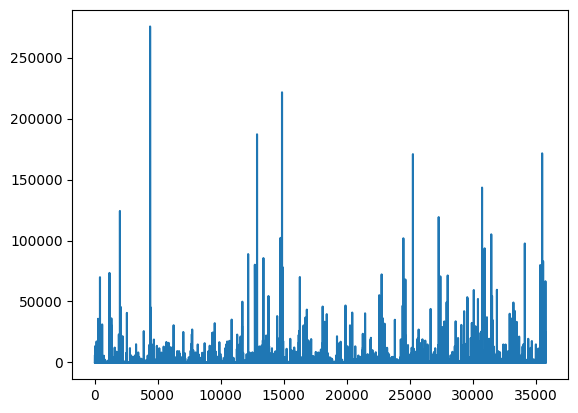

In [47]:
df['Déchets'].plot()

Le code équivalent avec `matplotlib` serait:


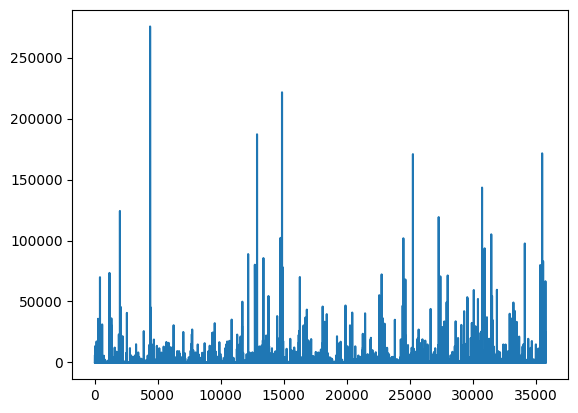

In [48]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Déchets'])

Par défaut, la visualisation obtenue est une série. Ce n’est
pas forcément celle attendue puisqu’elle n’a de sens que pour des séries temporelles. En tant que *data scientist* sur microdonnées, on s’intéresse plus fréquemment à un histogramme pour avoir une idée de la distribution des données.
Pour cela, il suffit d’ajouter l’argument `kind = 'hist'`:


<Axes: >

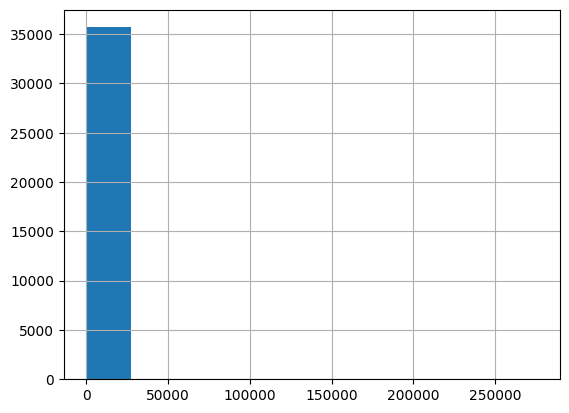

In [49]:
df['Déchets'].hist()

Avec des données dont la distribution est non normalisée,
ce qui représente de nombreuses variables du monde réel,
les histogrammes sont généralement peu instructifs. Le *log* peut être une solution
pour remettre à une échelle comparable certaines valeurs extrêmes:


<Axes: ylabel='Frequency'>

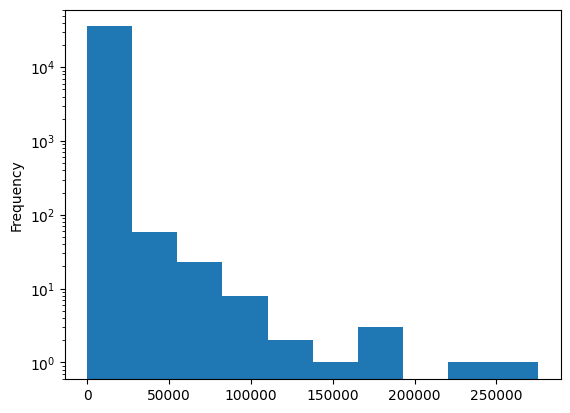

In [50]:
df['Déchets'].plot(kind = 'hist', logy = True)

La sortie est un objet `matplotlib`. La *customisation* de ces
figures est ainsi
possible (et même désirable car les graphiques `matplotlib`
sont, par défaut, assez rudimentaires).
Cependant, il s’agit d’une méthode rapide pour la construction
de figures qui nécessite du travail pour une visualisation
finalisée. Cela passe par un travail approfondi sur l’objet
`matplotlib` ou l’utilisation d’une librairie plus haut
niveau pour la représentation graphique (`seaborn`, `plotnine`, `plotly`, etc.).

La partie de ce cours consacrée à la visualisation de données présentera succinctement ces différents
paradigmes de visualisation. Ceux-ci ne dispensent pas de faire
preuve de bon sens dans le choix du graphique utilisé
pour représenter une statistique descriptive (cf. [cette conférence d’Eric Mauvière](https://ssphub.netlify.app/talk/2024-02-29-mauviere/) ).

# 9. Exercice de synthèse

Cette exercice synthétise plusieurs étapes de préparation et d’exploration de données pour mieux comprendre la structure
du phénomène qu’on désire étudier à savoir les émissions de gaz carbonique en France.

Il est recommandé de repartir d’une session vierge (dans un *notebook* il faut faire `Restart Kernel`) pour ne pas avoir un environnement pollué par d’autres objets. Vous pouvez ensuite exécuter le code suivant pour avoir la base nécessaire:


In [1]:
import pandas as pd

emissions = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
emissions.head(2)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207



<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
Exercice 2: Découverte des verbes de Pandas pour manipuler des données
</div>
</div>
<div class="callout-body-container callout-body">

En premier lieu, on propose de se familiariser avec les opérations sur
les colonnes.

1.  Créer un *dataframe* `emissions_copy` ne conservant que les colonnes
    `INSEE commune`, `Commune`, `Autres transports` et `Autres transports international`

<details>

<summary>

Indice pour cette question

</summary>

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/select_pandas.png)

</details>

1.  Comme les noms de variables sont peu pratiques, les renommer de la
    manière suivante :
    -   `INSEE commune` $\to$ `code_insee`
    -   `Autres transports` $\to$ `transports`
    -   `Autres transports international` $\to$ `transports_international`

<details>

<summary>

Indice pour cette question

</summary>

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/rename_pandas.png)

</details>

1.  On propose, pour simplifier, de remplacer les valeurs manquantes (`NA`)
    par la valeur 0. Utiliser la
    méthode [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
    pour transformer les valeurs manquantes en 0.

2.  Créer les variables suivantes :

    -   `dep`: le département. Celui-ci peut être créé grâce aux deux premiers caractères de `code_insee` en appliquant la méthode `str` ;
    -   `transports_total`: les émissions du secteur transports (somme des deux variables)

<details>

<summary>

Indice pour cette question

</summary>

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/mutate_pandas.png)

</details>

1.  Ordonner les données du plus gros pollueur au plus petit
    puis ordonner les données
    du plus gros pollueur au plus petit par département (du 01 au 95).

<details>

<summary>

Indice pour cette question

</summary>

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/arrange_pandas.png)

</details>

1.  Ne conserver que les communes appartenant aux départements 13 ou 31.
    Ordonner ces communes du plus gros pollueur au plus petit.

<details>

<summary>

Indice pour cette question

</summary>

![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/filter_pandas.png)

</details>

Revenir au jeu `emission` initial

1.  Calculer les émissions totales par secteur. Calculer la part de chaque secteur dans les émissions totales. Transformer en tonnes les volumes avant d’afficher les résultats

2.  Calculer pour chaque commune les émissions totales après avoir imputé les valeurs manquantes à 0. Garder les 100 communes les plus émettrices. Calculer la part de chaque secteur dans cette émission. Comprendre les facteurs pouvant expliquer ce classement.

<details>

<summary>

Aide si vous êtes en difficulté sur la question 8

</summary>

Jouer avec le paramètre `axis` lors de la construction d’une statistique agrégée.

</details>

</div>
</div>


In [17]:
emissions_copy = emissions[['INSEE commune', 'Commune', 'Autres transports', 'Autres transports international']].copy()
emissions_copy.rename({'INSEE commune': 'code_insee', 'Autres transports': 'transports', 'Autres transports international': 'transports_international'}, axis=1, inplace=True)
emissions_copy.fillna(0)

emissions_copy['dep'] = emissions_copy['code_insee'].str[:2]
emissions_copy['transports_total'] = emissions_copy['transports'] + emissions_copy['transports_international']

emissions_copy.sort_values('transports_total', ascending=False).head(10)
emissions_copy.sort_values(['dep', 'transports_total'], ascending=[True, False]).head(10)

emissions_copy.loc[emissions_copy['dep'].isin(['13', '31'])].sort_values('transports_total', ascending=False).head(10)

emissions_totales = pd.DataFrame(emissions.sum(numeric_only=True), columns=['emissions'])
emissions_totales['emissions %'] = (100 * emissions_totales['emissions'] / emissions_totales['emissions'].sum()).round(2)
emissions_totales['emissions'] /= 1000
emissions_totales['emissions'] = emissions_totales['emissions'].round(0)

display(emissions_totales)

emissions.fillna(0, inplace=True)
emissions['total'] = emissions.sum(axis=1, numeric_only=True)
emissions = emissions.sort_values('total', ascending=False).head(100)
for c in emissions.columns:
	if c not in ['INSEE commune', 'Commune', 'total']:
		emissions['Part_' + c] = emissions[c] / emissions['total'] * 100
		
emissions.head()


,emissions,emissions %
Agriculture,251.0,0.11
Autres transports,3289.0,1.44
Autres transports international,20473.0,8.99
CO2 biomasse hors-total,8227.0,3.61
Déchets,2084.0,0.92
Energie,15075.0,6.62
Industrie hors-énergie,41084.0,18.04
Résidentiel,8916.0,3.92
Routier,8865.0,3.89
Tertiaire,5569.0,2.45


,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,...,Part_Part_Agriculture,Part_Part_Autres transports,Part_Part_Autres transports international,Part_Part_CO2 biomasse hors-total,Part_Part_Déchets,Part_Part_Energie,Part_Part_Industrie hors-énergie,Part_Part_Résidentiel,Part_Part_Routier,Part_Part_Tertiaire
4382,13039,FOS-SUR-MER,305.092893,1893.383189,1.722723e+04,50891.367548,275500.374439,2.296711e+06,6.765119e+06,9466.388806,...,8.391397e-09,5.207637e-08,4.738248e-07,1.399737e-06,7.577473e-06,6.316965e-05,1.860705e-04,2.603674e-07,0.000002,0.000001
22671,59183,DUNKERQUE,811.390947,3859.548994,3.327586e+05,71922.181764,23851.780482,1.934988e+06,5.997333e+06,113441.727216,...,2.715069e-08,1.291479e-07,1.113474e-05,2.406653e-06,7.981261e-07,6.474840e-05,2.006822e-04,3.795976e-06,0.000003,0.000002
4398,13056,MARTIGUES,855.299300,2712.749275,3.043476e+04,35925.561051,44597.426397,1.363402e+06,2.380185e+06,22530.797276,...,1.329938e-07,4.218160e-07,4.732420e-06,5.586206e-06,6.934628e-06,2.120007e-04,3.701043e-04,3.503402e-06,0.000013,0.000007
30560,76476,PORT-JEROME-SUR-SEINE,2736.931327,121.160849,2.086403e+04,22846.964780,78.941581,1.570236e+06,2.005643e+06,21072.566129,...,5.085077e-07,2.251106e-08,3.876429e-06,4.244848e-06,1.466694e-08,2.917418e-04,3.726382e-04,3.915174e-06,0.000002,0.000003
31108,77291,LE MESNIL-AMELOT,782.183307,133834.090767,3.303394e+06,3330.404124,111.613197,8.240952e+02,2.418925e+03,1404.400153,...,1.622571e-07,2.776271e-05,6.852600e-04,6.908631e-07,2.315318e-08,1.709513e-07,5.017847e-07,2.913305e-07,0.000002,0.000003


A la question 5, quand on ordonne les communes exclusivement à partir de la variable `transports_total`, on obtient ainsi:

A la question 6, on obtient ce classement :


A la question 7, le tableau obtenu ressemble à


A l’issue de la question 8, on comprend un peu mieux les facteurs qui peuvent expliquer une forte émission au niveau communal. Si on regarde les trois principales communes émettrices, on peut remarquer qu’il s’agit de villes avec des raffineries:


Grâce à nos explorations minimales avec `Pandas`, on voit que ce jeu de données nous donne donc une information sur la nature du tissu productif français et des conséquences environnementales de certaines activités.

# Références

-   Le site
    [pandas.pydata](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)
    fait office de référence

-   Le livre `Modern Pandas` de Tom Augspurger : https://tomaugspurger.github.io/modern-1-intro.html

McKinney, Wes. 2012. *Python for data analysis: Data wrangling with Pandas, NumPy, and IPython*. " O’Reilly Media, Inc.".

Wickham, Hadley, Mine Çetinkaya-Rundel, et Garrett Grolemund. 2023. *R for data science*. " O’Reilly Media, Inc.".
